XGBoost Hiperparametreli İsabeti: 0.7114120711551118
              precision    recall  f1-score   support

           0       0.72      0.80      0.75     59879
           1       0.70      0.61      0.65     47998

    accuracy                           0.71    107877
   macro avg       0.71      0.70      0.70    107877
weighted avg       0.71      0.71      0.71    107877

XGBoost Hiperparametresiz İsabeti: 0.6954401772388924
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     59879
           1       0.69      0.57      0.63     47998

    accuracy                           0.70    107877
   macro avg       0.69      0.68      0.68    107877
weighted avg       0.69      0.70      0.69    107877



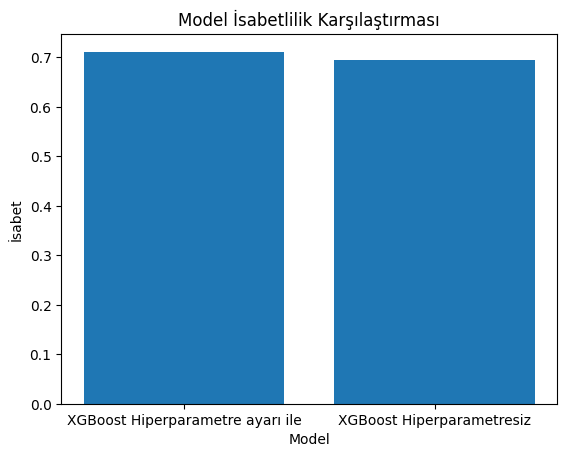

CPU times: total: 1min 6s
Wall time: 14.9 s


In [55]:
%%time
# Gerekli Kütüphaneleri İçe Aktar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier  
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Veri Setini Yükle ve Oku
data = pd.read_csv(r"D:\users\m_ozdemir15\Desktop\Okul\Y.Lisans\2.Dönem\Makine Öğrenmesi\proje\AirlinesDelayed.csv")
data.head()

# Veri Ön İşleme Adımı

# Eksik değerleri ele al, gerekiyorsa kaldır
data.dropna(inplace=True)

# Kategorik değişkenleri kodla
label_encoders = {}
categorical_columns = ['Airline', 'AirportFrom', 'AirportTo']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Veriyi X (özellikler) ve y (hedef) olarak böl
X = data.drop('Delay', axis=1)
y = data['Delay']

# Veriyi Eğitim ve Test Kümelerine Ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellik Ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # XGBoost için Model Değerlendirmesi ve Eğitimi
model_xgb1 = XGBClassifier(learning_rate=0.19, n_estimators=97, max_depth=11, subsample=0.90, colsample_bytree=0.83)  # XGBoost hyper parametre model parametreleri
#defaultda parametre birimleri  learning_rate [default=0.3]  n_estimators=97 [default=100] max_depth [default=6] subsample [default=1] 
#colsample_bytree [default=5]
model_xgb1.fit(X_train, y_train)  #  XGBoost model Eğitimi

# XGBoost Model Eğitimi
y_pred_xgb1 = model_xgb1.predict(X_test)
accuracy_xgb1 = accuracy_score(y_test, y_pred_xgb1)
report_xgb1 = classification_report(y_test, y_pred_xgb1)

print(f'XGBoost Hiperparametreli İsabeti: {accuracy_xgb1}')
print(report_xgb1)

model_xgb2 = XGBClassifier()  #XGBoost model  hyperparametersiz oluştur

model_xgb2.fit(X_train, y_train)  # XGBoost model eğit

# XGBoost Model Değerlendirme
y_pred_xgb2 = model_xgb2.predict(X_test)
accuracy_xgb2 = accuracy_score(y_test, y_pred_xgb2)
report_xgb2 = classification_report(y_test, y_pred_xgb2)

print(f'XGBoost Hiperparametresiz İsabeti: {accuracy_xgb2}')
print(report_xgb2)

# İsabeti her iki model için tanımla
accuracy = [accuracy_xgb1, accuracy_xgb2]

# Etiketleri her iki model için tanımla
labels = ['XGBoost Hiperparametre ayarı ile', 'XGBoost Hiperparametresiz']

plt.bar(labels, accuracy)
plt.xlabel('Model')
plt.ylabel('İsabet')
plt.title('Model İsabetlilik Karşılaştırması')
plt.show()
